In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [2]:
def f(theta):
    return theta**4 - theta**2 - theta**3 + theta

def k(theta, cont):
    return (1/np.sqrt(2*np.pi*cont))*np.exp(-(theta**2)/(2*cont))

def g(theta, cont):
    n = 1000
    theta_ = np.linspace(-6*np.sqrt(cont), 6*np.sqrt(cont), n)
    dtheta = theta_[1] - theta_[0]
    
    sum = (f(theta - theta_[0])*k(theta_[0], cont) + f(theta - theta_[-1])*k(theta_[-1], cont))/2
    for i in range(1, n-1):
        sum += f(theta - theta_[i])*k(theta_[i], cont)
    sum *= dtheta
    return sum

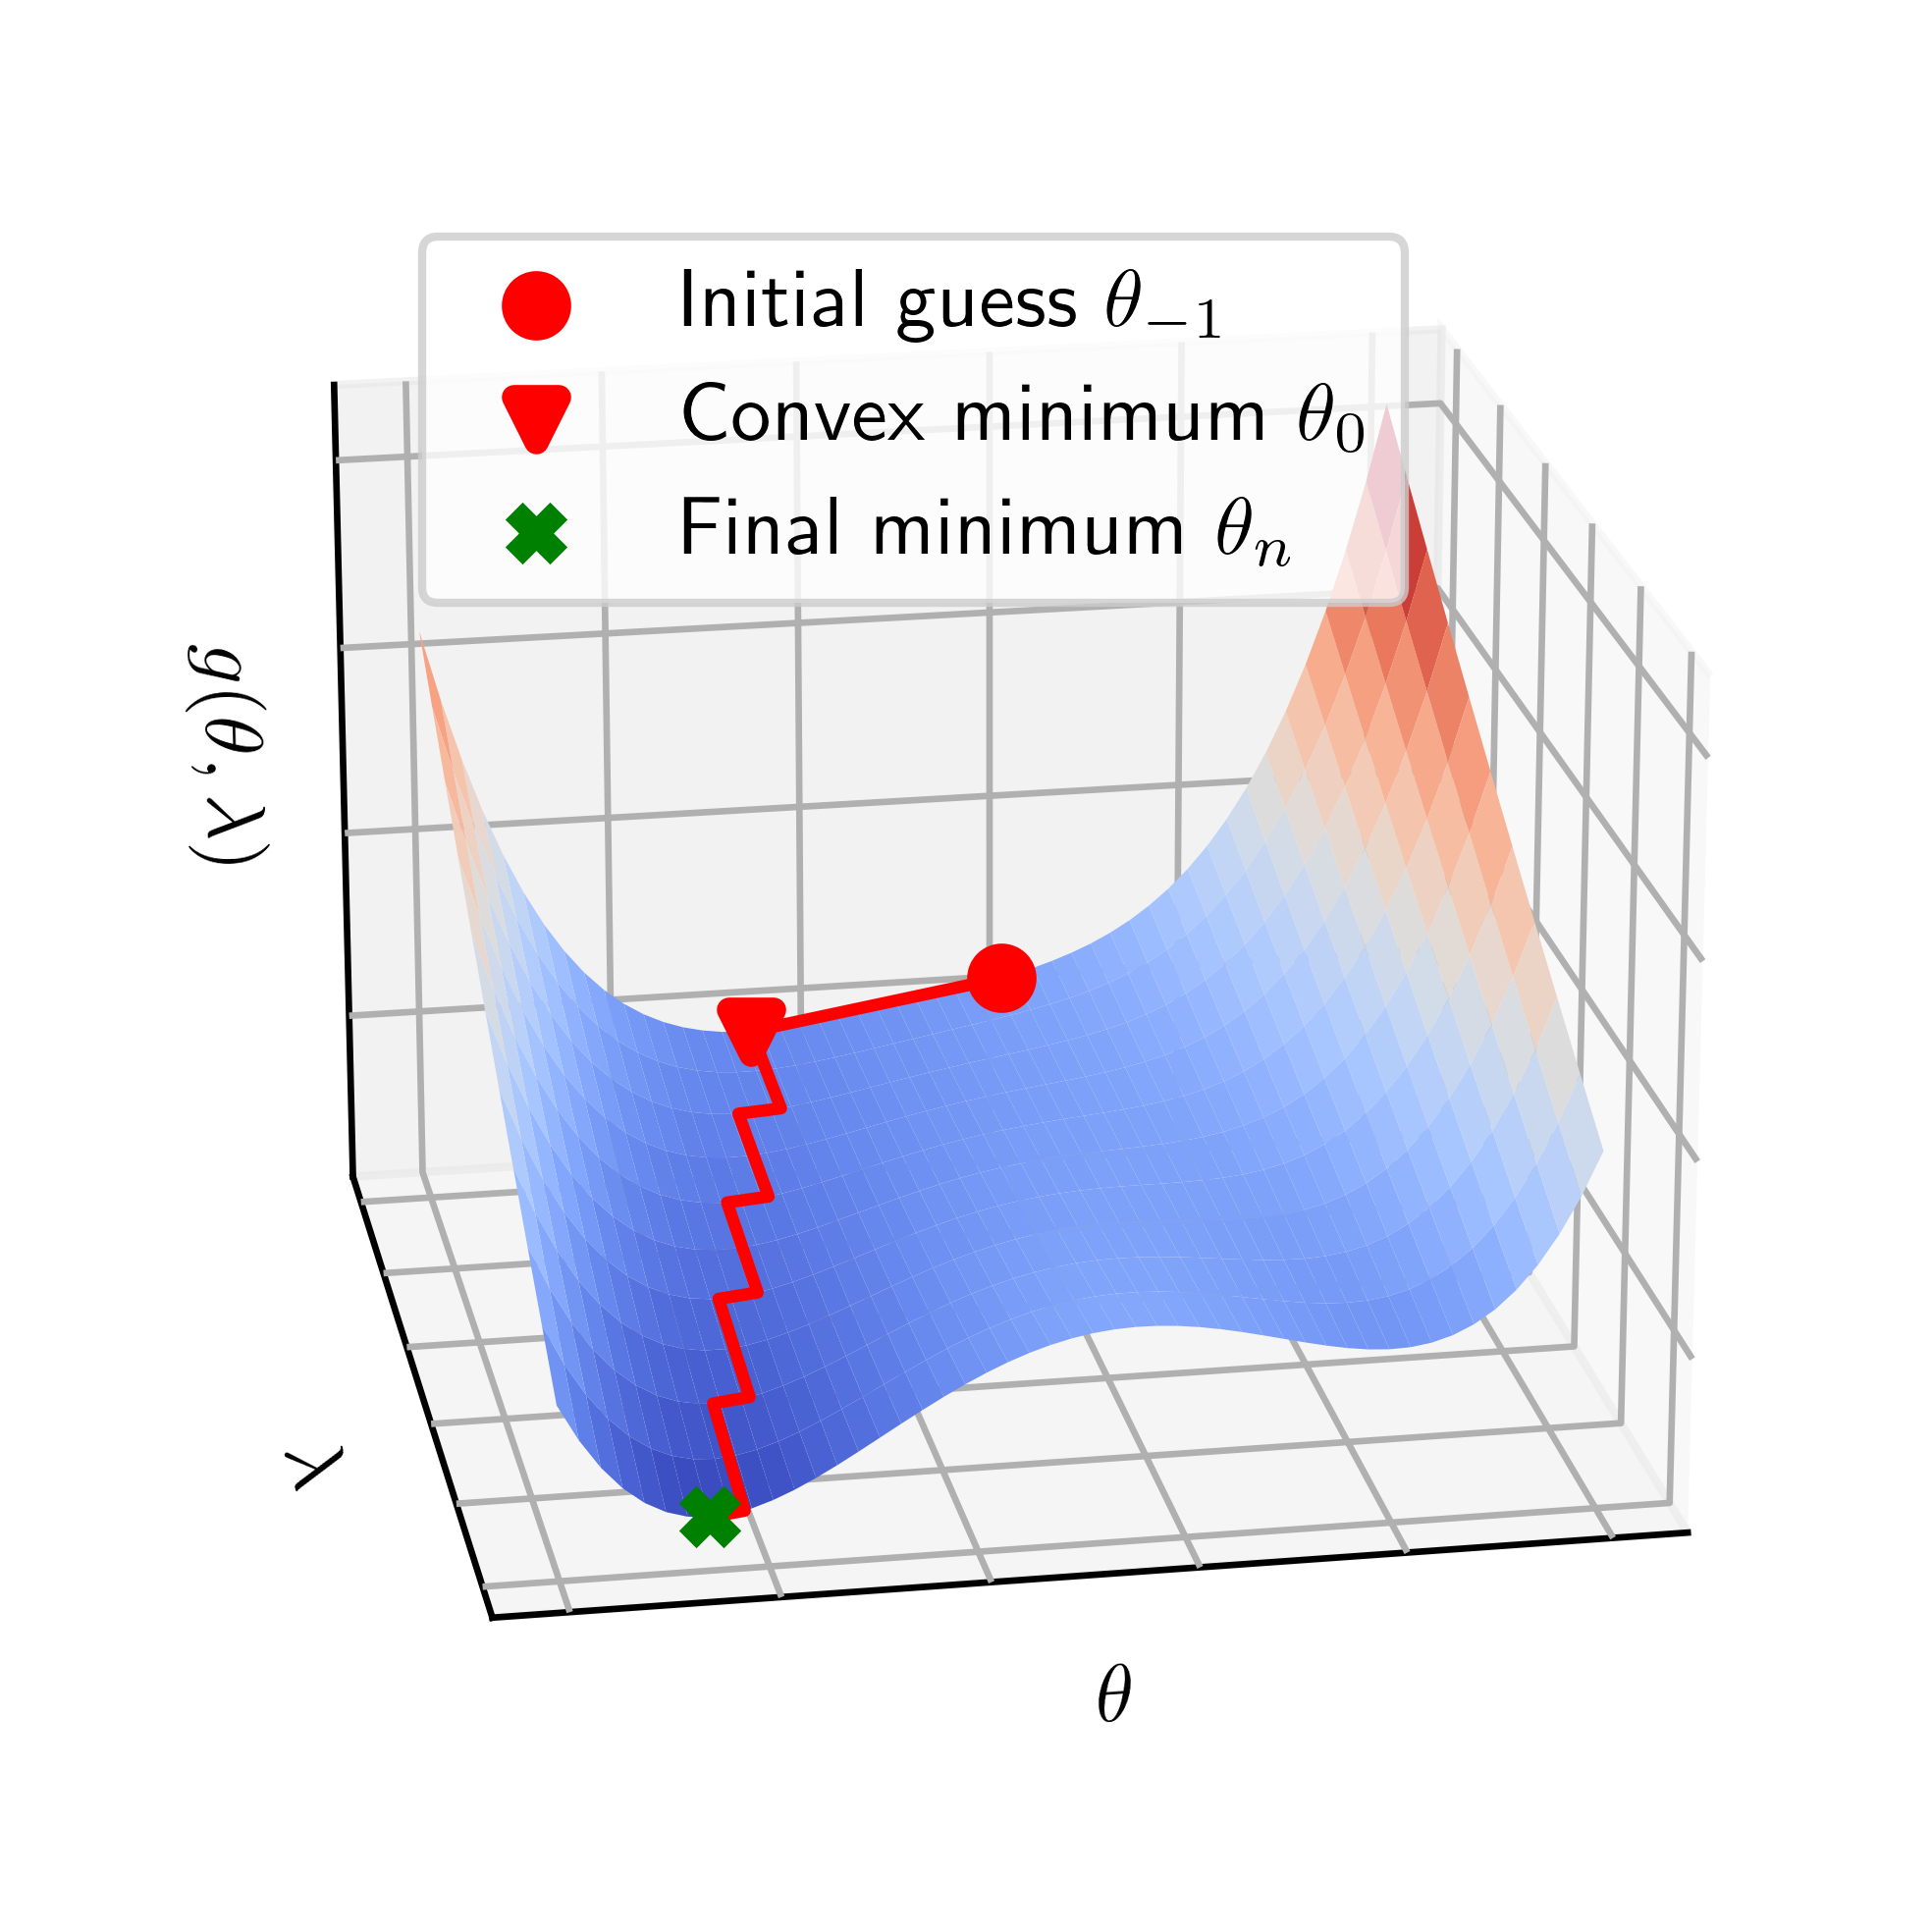

In [3]:
def main():
    ntheta = 50
    ncont = 11

    theta = np.outer(np.linspace(-1, 1.5, ntheta), np.ones(ncont))
    cont = np.outer(np.ones(ntheta), np.linspace(0.25, 0.0001, ncont))
    z = np.zeros((ntheta, ncont))

    theta0 = 0.5
    thetamin = [theta0]
    contmin = [cont[0, 0]]
    zmin = [g(theta0, cont[0, 0])]

    for j in range(ncont):
        for i in range(ntheta):
            z[i,j] = g(theta[i,j], cont[i,j])
        
        if j % 2 == 0:
            if j > 0:
                thetamin.append(thetamin[-1])
                contmin.append(cont[0, j])
                zmin.append(g(thetamin[-1], contmin[-1]))

            thetamin.append(sp.optimize.minimize(g, thetamin[-1], args=(cont[0, j],)).x[0])
            contmin.append(cont[0, j])
            zmin.append(g(thetamin[-1], contmin[-1]))
    
    fig = plt.figure(figsize=(4, 4), dpi=600)
    ax = plt.axes(projection='3d', computed_zorder=False)
    ax.plot_surface(theta, cont, z, cmap='coolwarm', edgecolor=None, zorder=-1)
    ax.plot(thetamin, contmin, zmin, color='red', zorder=5)

    ax.scatter(thetamin[0], contmin[0], zmin[0], marker="o", color="red", linewidth=3, s=30, zorder=6, label=r"Initial guess $\theta_{-1}$")
    ax.scatter(thetamin[1], contmin[1], zmin[1], marker="v", color="red", linewidth=3, s=30, zorder=7, label=r"Convex minimum $\theta_{0}$")
    ax.scatter(thetamin[-1], contmin[-1], zmin[-1], marker="x", color="green", linewidth=3, s=30, zorder=8, label=r"Final minimum $\theta_{n}$")
    ax.legend(loc=(0.2, 0.7))

    ax.elev = 20
    ax.azim = -100

    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.set_ticklabels([])
        axis._axinfo['tick']['inward_factor'] = 0.0
        axis._axinfo['tick']['outward_factor'] = 0.0

    ax.set_xlabel(r'$\theta$', labelpad=-10)
    ax.set_ylabel(r'$\lambda$', labelpad=-10)
    ax.set_zlabel(r'$g(\theta, \lambda)$', labelpad=-10)

    #fig.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()